In [14]:
import math
#OpenCV has a function to read video, which is cv2
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
#Initializing mediapipe pose class
mp_pose=mp.solutions.pose

#setting up pose function
pose=mp_pose.Pose(static_image_mode=True,min_detection_confidence=0.3,model_complexity=2)
#Initializing mediapipe frawing class, useful for annotation
mp_drawing=mp.solutions.drawing_utils

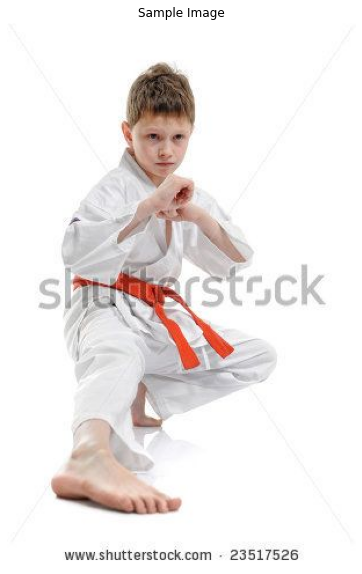

In [12]:
#Read an image from specified path
sample_img=cv2.imread('kar.jpg')

#specify a size of figure
plt.figure(figsize=[10,10])

#display sample image , convert BGR to RGB for display
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [22]:
#perform pose detection after converting image into RGB format
results=pose.process(cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB))

#Check if any landmarks are found
if results.pose_landmarks:
    
    #iterate two times to display first two landmarks
    for i in range(2):
        
        #display found normalised landmarks
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

RuntimeError: Graph has errors: 
Calculator::Open() for node "poselandmarkbyroicpu__inferencecalculator__poselandmarkbyroicpu__InferenceCalculator" failed: ; interpreter_ilure (mediapipe/calculators/tensor/inference_calculator_cpu.cc:152) 

In [26]:
image_height,image_width,_=sample_img.shape
results = super(self).process(input_data={sample_img: image})
#Check if any landmarks are found
if results.pose_landmarks:
    
    #iterate two times to display first two landmarks
    for i in range(2):
        
        #display found normalised landmarks
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x*image_width}')
        print(f'y:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y*image_height}')
        print(f'z:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z*image_width}')
        print(f'visibility:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NameError: name 'self' is not defined

In [27]:
img_copy=sample_img.copy()
if results.pose_landmarks:
    mp_drawing.draw_landmarks(imag=img_copy,landmark_list=results.pose_landmarks,connection=mp_pose.POSE_CONNECTIONS)
    fig=plt.figure(figsize=[10,10])
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

NameError: name 'results' is not defined

In [28]:
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)

NameError: name 'results' is not defined

In [31]:
def detectPose(image,pose,display=True):
    output_image=image.copy()
    imageRGB=cv2.cvtColor(image,cv2,COLOR_BGR2RGB)
    results=pose.Process(imageRGB)
    height,width,_=image.shape
    landmarks=[]
    if results.pose.landmarks:
        mp_drawing.draw_landmarks(image=output_image,landmark_list=results.pose_landmarks,connecions=mp_pose.POSE_CONNECTIONS)
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x*width),int(landmark.y*height),(landmark.z*width)))
    if display:
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');      
        mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)
    else:
        return output_image,landmarks

In [32]:
image=cv2.imread('kar.jpg')
detectPose(image,pose,display=True)

NameError: name 'COLOR_BGR2RGB' is not defined